In [1]:
import pandas as pd 
import numpy as np 

import re

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import MinMaxScaler

import scipy.sparse as sp

from sklearn.metrics.pairwise import cosine_similarity



In [2]:
#Importing data 
df= pd.read_csv("C:/Users/ADMIN\Documents/My projects/Creator-Brand-Recommender/combined_instagram_data.csv")

print(df.columns)

#Shape of the data
print (f'Number of entries: {df.shape[0]}')
print (f'Number of columns: {df.shape[1]}')




Index(['account', 'fbid', 'id', 'followers', 'posts_count',
       'is_business_account', 'is_professional_account', 'is_verified',
       'avg_engagement', 'external_url', 'biography', 'business_category_name',
       'category_name', 'post_hashtags', 'following', 'posts',
       'profile_image_link', 'profile_url', 'profile_name', 'highlights_count',
       'highlights', 'full_name', 'is_private', 'bio_hashtags',
       'business_email', 'phone_number', 'url', 'is_joined_recently',
       'has_channel', 'partner_id', 'business_address', 'timestamp', 'input',
       'error', 'error_code', 'warning', 'warning_code', 'source_file',
       'processed_at'],
      dtype='object')
Number of entries: 2532
Number of columns: 39


In [3]:
# Check for duplicated rows
duplicated_count = df.duplicated().sum()

# Get detailed information about the data
df_info = df.info()

# Get statistical summary
df_description = df.describe()


print("### Duplicated Rows Count ###")
print(f'Total duplicated rows: {duplicated_count}\n')

print("### DataFrame Info ###")
df_info  
print("\n")

print("### DataFrame Statistical Summary ###")
print(df_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account                  2531 non-null   object 
 1   fbid                     2531 non-null   float64
 2   id                       2531 non-null   float64
 3   followers                2531 non-null   float64
 4   posts_count              2531 non-null   float64
 5   is_business_account      2531 non-null   float64
 6   is_professional_account  2531 non-null   float64
 7   is_verified              2531 non-null   float64
 8   avg_engagement           2352 non-null   float64
 9   external_url             1774 non-null   object 
 10  biography                2336 non-null   object 
 11  business_category_name   77 non-null     object 
 12  category_name            1969 non-null   object 
 13  post_hashtags            0 non-null      float64
 14  following               

In [4]:
#checking for missing  values
df.isnull().sum()

account                       1
fbid                          1
id                            1
followers                     1
posts_count                   1
is_business_account           1
is_professional_account       1
is_verified                   1
avg_engagement              180
external_url                758
biography                   196
business_category_name     2455
category_name               563
post_hashtags              2532
following                     1
posts                       176
profile_image_link            1
profile_url                   1
profile_name                 46
highlights_count              1
highlights                 2532
full_name                    46
is_private                    1
bio_hashtags               2276
business_email             2532
phone_number               2532
url                           1
is_joined_recently            1
has_channel                   1
partner_id                    1
business_address           2421
timestam

## Data Cleaning 

Dataset with niches saved successfully at: C:/Users/ADMIN/Documents/My projects/Creator-Brand-Recommender/combined_instagram_data_with_niches.csv
(2532, 41)
(2532, 23)
(2532, 13)


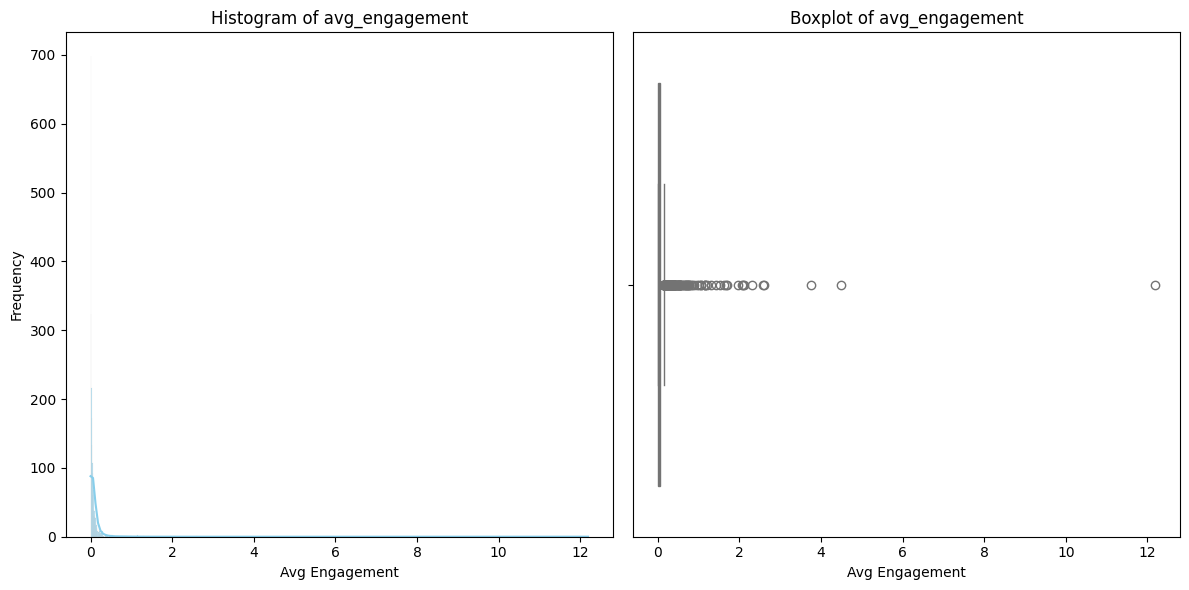

     account  followers  posts_count  is_business_account  \
2498     NaN        NaN          NaN                  NaN   

      is_professional_account  is_verified  avg_engagement biography  \
2498                      NaN          NaN         0.02325       NaN   

     category_name  following  highlights_count biography_clean  niche  
2498           NaN        NaN               NaN                  Other  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16568\2863373419.py:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_engagement'].fillna(median_val, inplace=True)


(2531, 10)

In [ ]:
# Define keyword dictionaries for niches
niche_keywords = {
    'Health': ['health','fitness', 'workout', 'gym', 'trainer', 'yoga','fit','dermatologist','swimmer','pharmacy','hospital','clinic','surgery','wellness'],
    'Lifestyle':['lifestyle','mum','dad','mother','father','mama','marriage', 'married','therapy','spa','pet','model','wife','parent','husband'],
    'Fashion': ['fashion', 'style', 'designer', 'clothing', 'beauty', 'makeup','clothes','dressing','wear','lotion','perfume','skin care','stylist'],
    'Travel': ['travel', 'wanderlust', 'vacation', 'adventure', 'explore','safari'],
    'Tech': ['tech', 'gadgets', 'software', 'developer', 'AI', 'programmer','machine','data','UI','UX'],
    'Food': ['food', 'recipe', 'chef', 'cooking', 'baking', 'restaurant','hotel','kitchen','foodie'],
    'Art': ['art', 'artist', 'drawing', 'painting', 'illustration', 'design','comedy','podcast','craft','photograph','choreography','actor','actress','writer','host','poet','storyteller','author'],
    'Music': ['music', 'singer', 'band', 'producer', 'songwriter', 'DJ','rapper','vocalist','saxophonist','musician'],
    'Business':['business','finance','financial','money','consultancy','shop','consulting','entrepreneur','store'],
}

# Preprocess the biography text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['biography_clean'] = df['biography'].fillna('').apply(clean_text)

# Match keywords to assign all matching niches
def assign_niches(bio, keywords_dict):
    niches = [niche for niche, keywords in keywords_dict.items() if any(keyword in bio for keyword in keywords)]
    return ' '.join(niches) if niches else 'Other'  # Join multiple niches with a space, or return 'Other'

# Apply the function to the clean biography column
df['niche'] = df['biography_clean'].apply(lambda x: assign_niches(x, niche_keywords))

# Save the updated dataset 
save_path = "C:/Users/ADMIN/Documents/My projects/Creator-Brand-Recommender/combined_instagram_data_with_niches.csv"
df.to_csv(save_path, index=False)

print(f"Dataset with niches saved successfully at: {save_path}")

print(df.shape)


# List of columns to drop
columns_to_drop = [
    'profile_name', 'full_name', 'fbid', 'id', 'external_url', 'business_category_name', 'posts',
    'profile_url', 'is_private', 'url', 'is_joined_recently', 'has_channel',
    'partner_id', 'timestamp','profile_image_link', 'input', 'source_file', 'processed_at'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

print(df.shape)

## Remove columns with more than 50% missing data 
# Calculate the threshold for 50% missing data
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)


print(df.shape)


## filling avg_engagement column 

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram 
sns.histplot(df['avg_engagement'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Histogram of avg_engagement')
axes[0].set_xlabel('Avg Engagement')
axes[0].set_ylabel('Frequency')

# Boxplot 
sns.boxplot(x=df['avg_engagement'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of avg_engagement')
axes[1].set_xlabel('Avg Engagement')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Since the data is highly skewed, impute missing values with the median
median_val = df['avg_engagement'].median()
df['avg_engagement'].fillna(median_val, inplace=True)

#Followers column 
null_followers = df[df['followers'].isnull()]
print(null_followers.head())
#Most of it's entries in other columns are empty hence we delete it 
df= df.dropna(subset=['followers'])

#Drop category name since it was replaced by niche
df = df.drop(columns=['category_name'])

# Drop the 'biography' column since it's now represented by 'niche'
df= df.drop(columns=['biography'])
df= df.drop(columns=['biography_clean'])



df.shape



In [6]:
#checking for missing  values
df.isnull().sum()

account                    0
followers                  0
posts_count                0
is_business_account        0
is_professional_account    0
is_verified                0
avg_engagement             0
following                  0
highlights_count           0
niche                      0
dtype: int64

In [7]:
df.columns

Index(['account', 'followers', 'posts_count', 'is_business_account',
       'is_professional_account', 'is_verified', 'avg_engagement', 'following',
       'highlights_count', 'niche'],
      dtype='object')

In [8]:
df.shape

(2531, 10)

## Exploratory Data Analysis

In [145]:
# Summary statistics for numeric columns
summary_stats = df[['followers', 'posts_count', 'avg_engagement', 'following', 'highlights_count']].describe()

summary_stats


,followers,posts_count,avg_engagement,following,highlights_count
count,2.531000e+03,2531.000000,2531.000000,2531.000000,2531.000000
mean,3.406060e+06,1747.451205,0.074111,1443.101146,16.711181
std,2.598881e+07,6908.049407,0.318686,1636.081122,284.062631
min,3.300000e+01,0.000000,0.000100,0.000000,0.000000
25%,3.403500e+03,89.000000,0.007450,316.500000,1.000000
50%,2.908300e+04,362.000000,0.023250,920.000000,5.000000
75%,4.750705e+05,1209.000000,0.057250,1899.000000,11.000000
max,6.829453e+08,159217.000000,12.187200,7505.000000,14229.000000


## Distribution of numeric variables

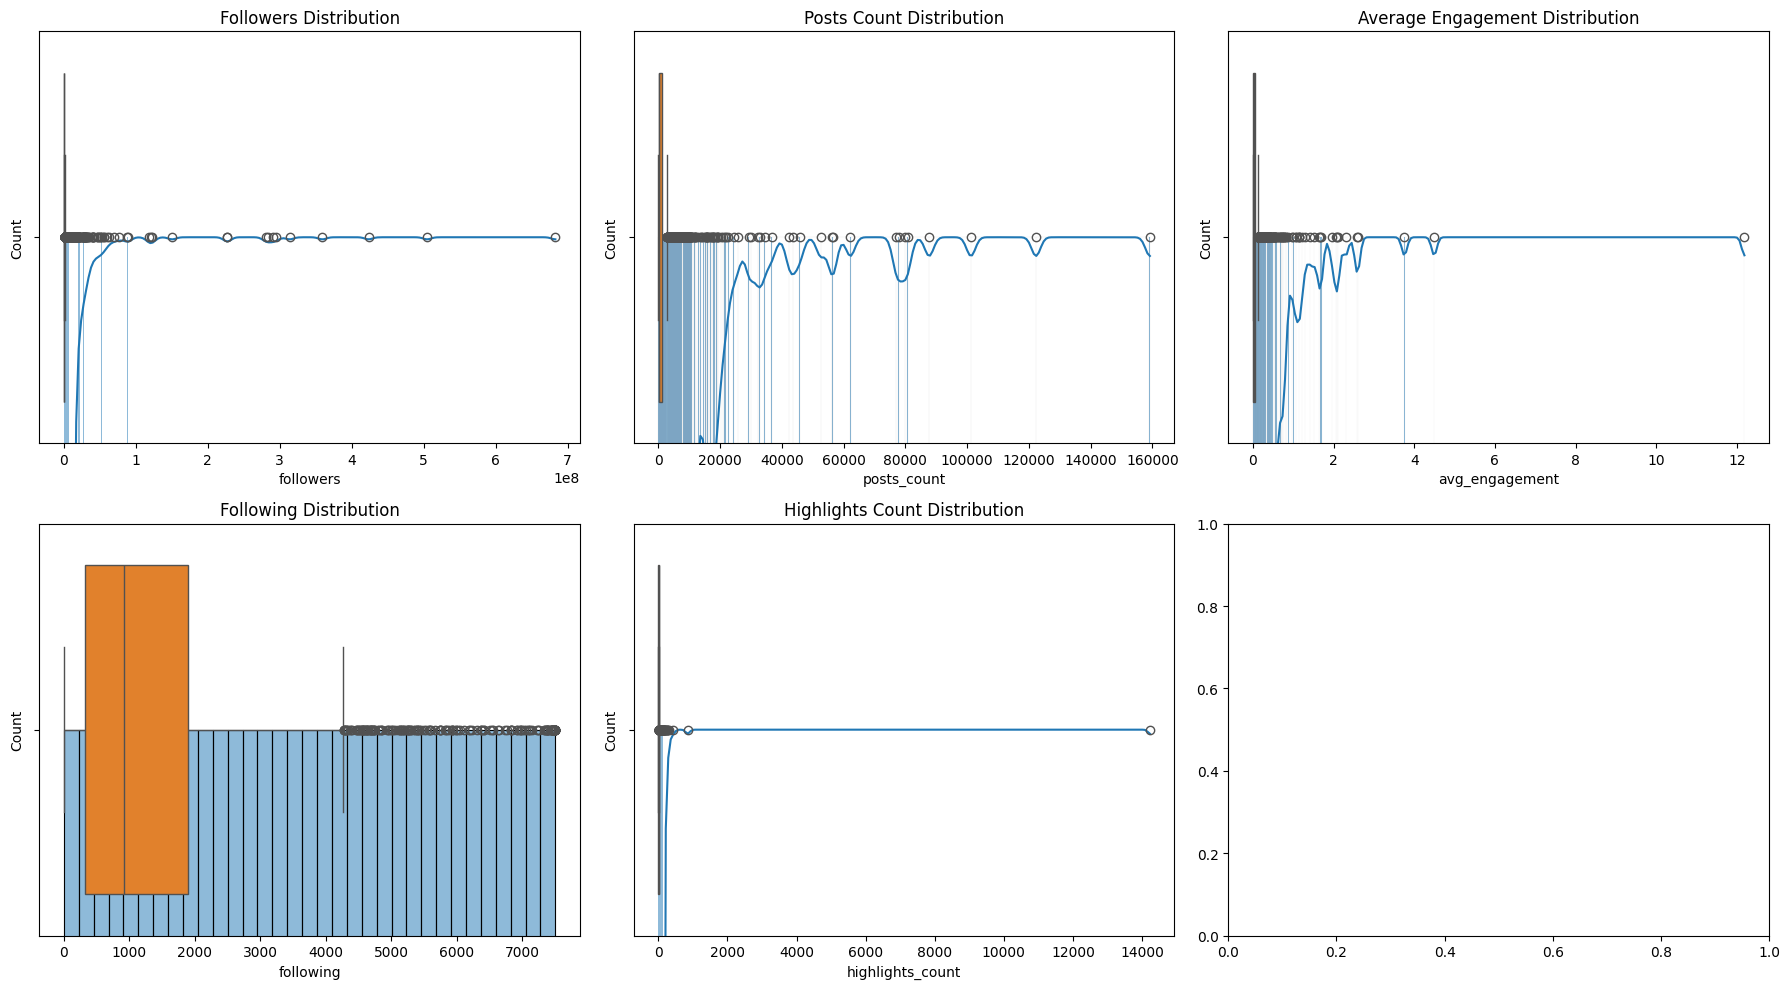

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot histograms
sns.histplot(df['followers'], ax=axes[0, 0], kde=True).set_title('Followers Distribution')
sns.histplot(df['posts_count'], ax=axes[0, 1], kde=True).set_title('Posts Count Distribution')
sns.histplot(df['avg_engagement'], ax=axes[0, 2], kde=True).set_title('Average Engagement Distribution')
sns.histplot(df['following'], ax=axes[1, 0], kde=True).set_title('Following Distribution')
sns.histplot(df['highlights_count'], ax=axes[1, 1], kde=True).set_title('Highlights Count Distribution')

# Plot boxplots
sns.boxplot(x=df['followers'], ax=axes[0, 0])
sns.boxplot(x=df['posts_count'], ax=axes[0, 1])
sns.boxplot(x=df['avg_engagement'], ax=axes[0, 2])
sns.boxplot(x=df['following'], ax=axes[1, 0])
sns.boxplot(x=df['highlights_count'], ax=axes[1, 1])

plt.tight_layout()
plt.show()


## Correlation Between Numerical Features

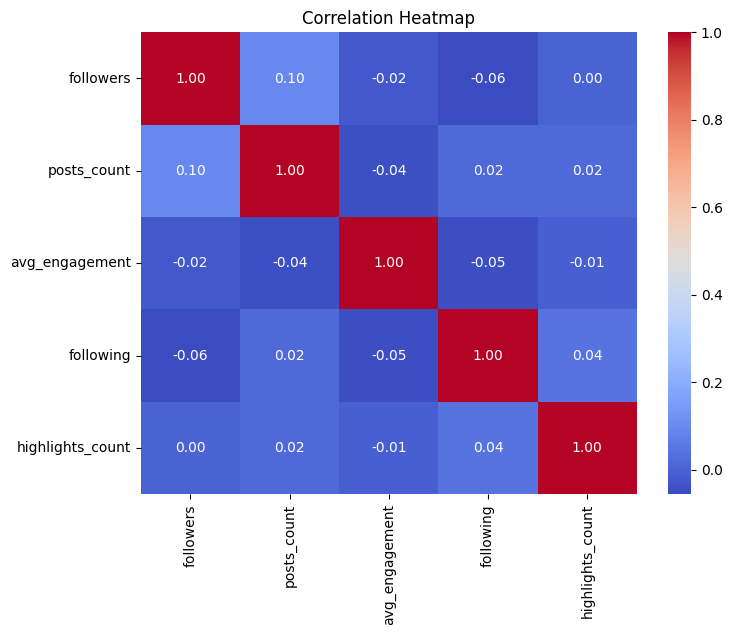

In [175]:
# Correlation matrix
correlation_matrix = df[['followers', 'posts_count', 'avg_engagement', 'following', 'highlights_count']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


## Observations:

1. There's a slight positive correlation between followers and posts_count. This means that as the number of followers increases, the number of posts also slightly tends to increase, though the relationship is weak 

2. There's a very weak negative correlation between followers and avg_engagement. This suggests that as followers increase, average engagement tends to decrease very slightly. 

3. A slight negative correlation between followers and following. This could suggest that as the number of followers increases, the number of accounts being followed tends to decrease slightly

4. There is no correlation between followers and highlights_count

5.  Negative correlation between posts_count and avg_engagement. This implies that as the number of posts increases, the average engagement decreases very slightly. 

6. A very weak positive correlation between posts_count and following, suggesting that as users post more, they tend to follow a slightly higher number of accounts. 

7. A very weak positive correlation between posts_count and highlights_count. This suggests that users who post more may have slightly more highlights. 

8. A slight negative correlation between avg_engagement and following, indicating that users with more following might experience slightly lower average engagement.(Revisit**) 

9. An extremely weak negative correlation, suggesting no real relationship between engagement and highlights. 

## Distribution of categorical features

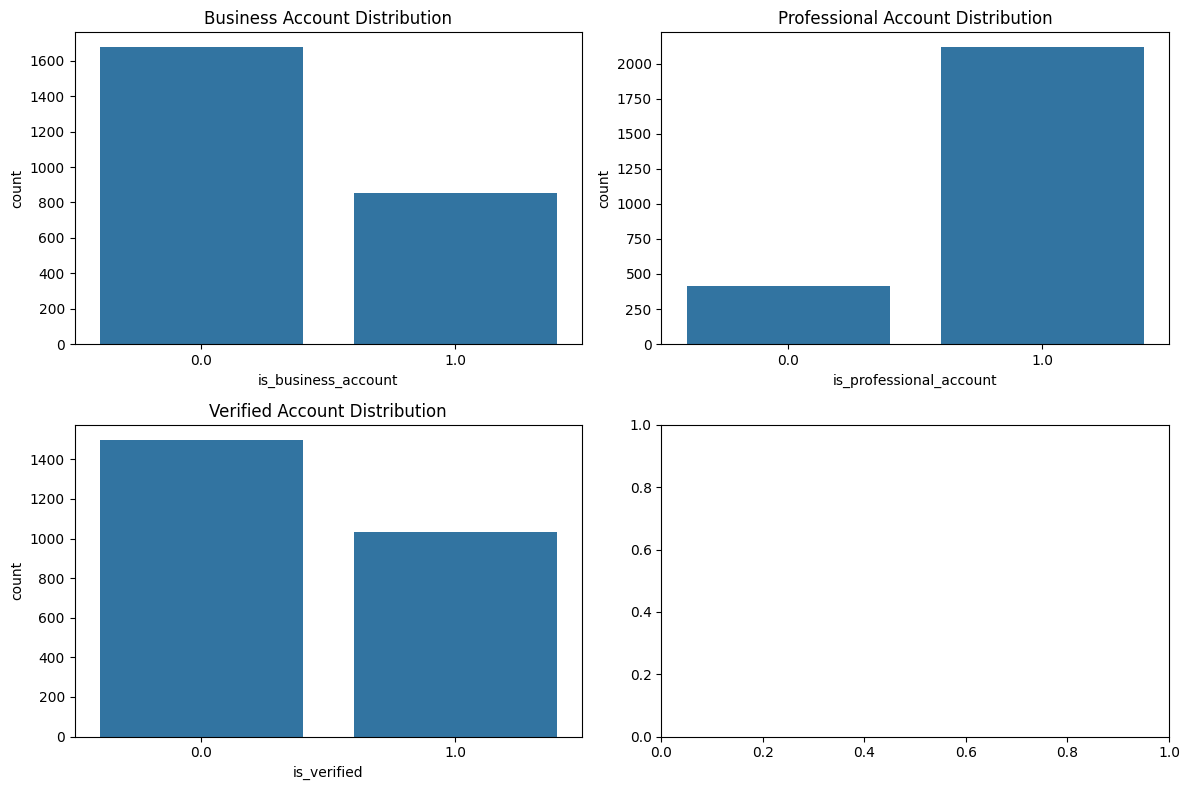

In [177]:
# Plot the distribution of categorical columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='is_business_account', data=df, ax=axes[0, 0]).set_title('Business Account Distribution')
sns.countplot(x='is_professional_account', data=df, ax=axes[0, 1]).set_title('Professional Account Distribution')
sns.countplot(x='is_verified', data=df, ax=axes[1, 0]).set_title('Verified Account Distribution')

plt.tight_layout()
plt.show()


In [187]:
df.dtypes

account                     object
followers                  float64
posts_count                float64
is_business_account        float64
is_professional_account    float64
is_verified                float64
avg_engagement             float64
following                  float64
highlights_count           float64
niche                       object
dtype: object

In [188]:
df.shape

(2531, 10)

## Data Pre-processing 

In [9]:
#Transfrom niche column to numeric 
Vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = Vectorizer.fit_transform(df['niche'])

numeric_features = [
    'followers', 'posts_count', 'is_business_account', 
    'is_professional_account', 'is_verified', 
    'avg_engagement', 'following', 'highlights_count'
]

# Normalize 
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[numeric_features])

normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

# Combine all the features 
numeric_sparse = sp.csr_matrix(normalized_data)
combined_features = sp.hstack([tfidf_matrix, numeric_sparse])



# content based recommender system

In [10]:
# Compute similarity
similarity_matrix = cosine_similarity(combined_features)


In [11]:
def recommend_accounts(account_name, df, similarity_matrix, top_n=5):
    # Get the index of the account
    account_idx = df[df['account'] == account_name].index[0]
    
    # Fetch similarity scores for the account
    similarity_scores = list(enumerate(similarity_matrix[account_idx]))
    
    # Sort by similarity scores in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of top_n most similar accounts
    similar_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    
    # Return the names of the similar accounts
    return df.iloc[similar_indices]['account']


In [12]:
#Testing
recommendations = recommend_accounts('kate_actress', df, similarity_matrix, top_n=5)

print("Recommended accounts:")
for idx, account in enumerate(recommendations, 1): 
    print(f"{idx}. {account}")


Recommended accounts:
1. kie_kie__
2. pamela.ashley.uba
3. roco_runs
4. eddiebutita
5. mattrife
